In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
import csv

In [ ]:
df = pd.read_csv('고령인구1km.csv', encoding='cp949')
df.head(10)

,Longitude,Latitude,layer_2,val,fid
0,125.127100,34.052418,신안250,73.0,79101
1,125.194140,34.684377,신안250,77.0,85360
2,125.378067,34.678356,신안250,36.0,48546
3,125.410382,34.645062,신안250,56.0,97526
4,125.444421,34.736890,신안250,79.0,46890
5,125.463781,34.730600,신안250,101.0,76538
6,125.468706,34.651700,신안250,14.0,67252
7,125.469064,34.207227,신안250,32.0,48515
8,125.853521,34.617985,신안250,34.0,88977
9,125.932763,34.721212,신안250,164.0,18304


In [ ]:
df[df['layer_2'] == '담양250']

,Longitude,Latitude,layer_2,val,fid
437,126.881223,35.287425,담양250,167.0,65975
438,126.883040,35.247285,담양250,64.0,32576
439,126.884317,35.260133,담양250,147.0,56952
440,126.887137,35.276294,담양250,506.0,49764
441,126.887941,35.276694,담양250,513.0,45895
...,...,...,...,...,...
564,127.068526,35.140087,담양250,27.0,69102
565,127.071866,35.285482,담양250,97.0,62832
566,127.086860,35.218368,담양250,40.0,130650
567,127.087429,35.268562,담양250,152.0,124285


In [ ]:
df_dam = df[df['layer_2'] == '담양250']
df_sin = df[df['layer_2'] == '신안250']
df_ham = df[df['layer_2'] == '함평250']

In [ ]:
df_dam.head()

,Longitude,Latitude,layer_2,val,fid
437,126.881223,35.287425,담양250,167.0,65975
438,126.883040,35.247285,담양250,64.0,32576
439,126.884317,35.260133,담양250,147.0,56952
440,126.887137,35.276294,담양250,506.0,49764
441,126.887941,35.276694,담양250,513.0,45895


In [ ]:
df_ham.head()

,Longitude,Latitude,layer_2,val,fid
100,126.378319,35.160881,함평250,67.0,55800
101,126.381494,35.168751,함평250,55.0,57876
102,126.390696,35.152685,함평250,91.0,64670
103,126.391451,35.165128,함평250,38.0,74638
104,126.392688,35.137782,함평250,94.0,40464


In [ ]:
df_sin.head()

,Longitude,Latitude,layer_2,val,fid
0,125.127100,34.052418,신안250,73.0,79101
1,125.194140,34.684377,신안250,77.0,85360
2,125.378067,34.678356,신안250,36.0,48546
3,125.410382,34.645062,신안250,56.0,97526
4,125.444421,34.736890,신안250,79.0,46890


In [ ]:
df.dropna(axis=0,how='any',subset=['Latitude','Longitude'],inplace=True)

In [ ]:
# Variable with the Longitude and Latitude
X=df_dam.loc[:,['fid','Latitude','Longitude']]
X

,fid,Latitude,Longitude
437,65975,35.287425,126.881223
438,32576,35.247285,126.883040
439,56952,35.260133,126.884317
440,49764,35.276294,126.887137
441,45895,35.276694,126.887941
...,...,...,...
564,69102,35.140087,127.068526
565,62832,35.285482,127.071866
566,130650,35.218368,127.086860
567,124285,35.268562,127.087429


C:\Users\82104\anaconda3\envs\ml\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


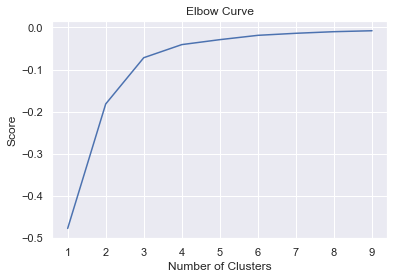

In [ ]:
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = df_dam[['Latitude']]
X_axis = df_dam[['Longitude']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]

plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()


In [ ]:
kmeans = KMeans(n_clusters = 3, init ='k-means++')
kmeans.fit(X[X.columns[1:3]]) # Compute k-means clustering.
X['cluster_label'] = kmeans.fit_predict(X[X.columns[1:3]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(X[X.columns[1:3]]) # Labels of each point
X.head(10)

,fid,Latitude,Longitude,cluster_label
437,65975,35.287425,126.881223,2
438,32576,35.247285,126.883040,2
439,56952,35.260133,126.884317,2
440,49764,35.276294,126.887137,2
441,45895,35.276694,126.887941,2
442,703593,35.274936,126.887950,2
443,72036,35.274801,126.887971,2
444,68340,35.262895,126.888401,2
445,67650,35.287822,126.894958,2
446,142209,35.286186,126.902177,2


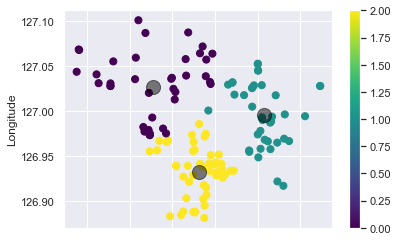

In [ ]:
X.plot.scatter(x = 'Latitude', y = 'Longitude', c=labels, s=50, cmap='viridis')  
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [ ]:
# df.head(5)

In [ ]:
X.head(5)

,fid,Latitude,Longitude,cluster_label
437,65975,35.287425,126.881223,2
438,32576,35.247285,126.883040,2
439,56952,35.260133,126.884317,2
440,49764,35.276294,126.887137,2
441,45895,35.276694,126.887941,2


In [ ]:
X = X[['fid','cluster_label']]
X.head(5)

,fid,cluster_label
437,65975,2
438,32576,2
439,56952,2
440,49764,2
441,45895,2


In [ ]:
clustered_data_dam = df_dam.merge(X, left_on='fid', right_on='fid')
clustered_data_dam.head(5)

,Longitude,Latitude,layer_2,val,fid,cluster_label
0,126.881223,35.287425,담양250,167.0,65975,2
1,126.883040,35.247285,담양250,64.0,32576,2
2,126.884317,35.260133,담양250,147.0,56952,2
3,126.887137,35.276294,담양250,506.0,49764,2
4,126.887941,35.276694,담양250,513.0,45895,2


In [ ]:
clustered_data_dam.to_csv('clustered_data_dam.csv', index=None, header = True, encoding = 'cp949')

In [ ]:
# Variable with the Longitude and Latitude
X = df_sin.loc[:,['fid','Latitude','Longitude']]
X

,fid,Latitude,Longitude
0,79101,34.052418,125.127100
1,85360,34.684377,125.194140
2,48546,34.678356,125.378067
3,97526,34.645062,125.410382
4,46890,34.736890,125.444421
...,...,...,...
95,102912,34.833572,126.352547
96,104121,34.840388,126.357367
97,97024,34.846820,126.361669
98,62853,34.874143,126.365690


C:\Users\82104\anaconda3\envs\ml\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


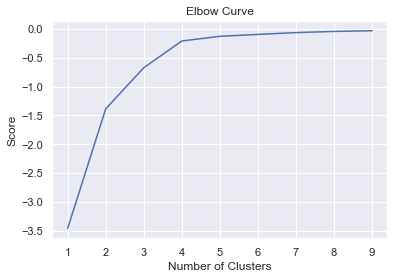

In [ ]:
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = df_sin[['Latitude']]
X_axis = df_sin[['Longitude']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]

plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 4, init ='k-means++')
kmeans.fit(X[X.columns[1:4]]) # Compute k-means clustering.
X['cluster_label'] = kmeans.fit_predict(X[X.columns[1:3]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(X[X.columns[1:3]]) # Labels of each point
X

,fid,Latitude,Longitude,cluster_label
0,79101,34.052418,125.127100,2
1,85360,34.684377,125.194140,2
2,48546,34.678356,125.378067,2
3,97526,34.645062,125.410382,2
4,46890,34.736890,125.444421,2
...,...,...,...,...
95,102912,34.833572,126.352547,3
96,104121,34.840388,126.357367,3
97,97024,34.846820,126.361669,3
98,62853,34.874143,126.365690,3


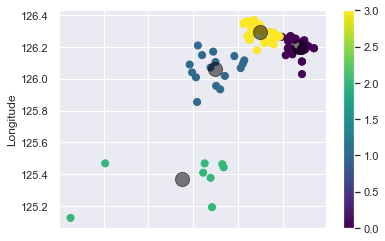

In [ ]:
X.plot.scatter(x = 'Latitude', y = 'Longitude', c=labels, s=50, cmap='viridis')  
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)          

In [ ]:
X.head(5)

,fid,Latitude,Longitude,cluster_label
0,79101,34.052418,125.127100,2
1,85360,34.684377,125.194140,2
2,48546,34.678356,125.378067,2
3,97526,34.645062,125.410382,2
4,46890,34.736890,125.444421,2


In [ ]:
X = X[['fid','cluster_label']]
X.head(5)

,fid,cluster_label
0,79101,2
1,85360,2
2,48546,2
3,97526,2
4,46890,2


In [ ]:
clustered_data_sin = df_sin.merge(X, left_on='fid', right_on='fid')
clustered_data_sin.head(5)

,Longitude,Latitude,layer_2,val,fid,cluster_label
0,125.127100,34.052418,신안250,73.0,79101,2
1,125.194140,34.684377,신안250,77.0,85360,2
2,125.378067,34.678356,신안250,36.0,48546,2
3,125.410382,34.645062,신안250,56.0,97526,2
4,125.444421,34.736890,신안250,79.0,46890,2


In [ ]:
clustered_data_sin.to_csv('clustered_data_sin.csv', index=None, header = True, encoding = 'cp949')

In [ ]:
# Variable with the Longitude and Latitude
X = df_ham.loc[:,['fid','Latitude','Longitude']]
X

,fid,Latitude,Longitude
100,55800,35.160881,126.378319
101,57876,35.168751,126.381494
102,64670,35.152685,126.390696
103,74638,35.165128,126.391451
104,40464,35.137782,126.392688
...,...,...,...
432,84735,35.141067,126.643770
433,78470,35.147912,126.645965
434,97920,35.173876,126.646550
435,90350,35.183881,126.649508


C:\Users\82104\anaconda3\envs\ml\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


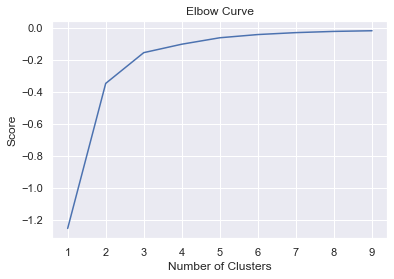

In [ ]:
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = df_ham[['Latitude']]
X_axis = df_ham[['Longitude']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]

plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 3, init ='k-means++')
kmeans.fit(X[X.columns[1:3]]) # Compute k-means clustering.
X['cluster_label'] = kmeans.fit_predict(X[X.columns[1:3]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(X[X.columns[1:3]]) # Labels of each point
X.head(10)

,fid,Latitude,Longitude,cluster_label
100,55800,35.160881,126.378319,1
101,57876,35.168751,126.381494,1
102,64670,35.152685,126.390696,1
103,74638,35.165128,126.391451,1
104,40464,35.137782,126.392688,1
105,76728,35.154077,126.394666,1
106,67740,35.138141,126.403506,1
107,72605,35.171167,126.403871,1
108,75375,35.154949,126.407865,1
109,99636,35.155227,126.408732,1


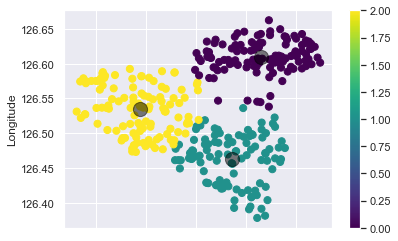

In [ ]:
X.plot.scatter(x = 'Latitude', y = 'Longitude', c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [ ]:
X.head(5)

,fid,Latitude,Longitude,cluster_label
100,55800,35.160881,126.378319,1
101,57876,35.168751,126.381494,1
102,64670,35.152685,126.390696,1
103,74638,35.165128,126.391451,1
104,40464,35.137782,126.392688,1


In [ ]:
X = X[['fid','cluster_label']]
X.head(5)

,fid,cluster_label
100,55800,1
101,57876,1
102,64670,1
103,74638,1
104,40464,1


In [ ]:
clustered_data_ham = df_ham.merge(X, left_on='fid', right_on='fid')
clustered_data_ham

,Longitude,Latitude,layer_2,val,fid,cluster_label
0,126.378319,35.160881,함평250,67.0,55800,1
1,126.381494,35.168751,함평250,55.0,57876,1
2,126.390696,35.152685,함평250,91.0,64670,1
3,126.391451,35.165128,함평250,38.0,74638,1
4,126.392688,35.137782,함평250,94.0,40464,1
...,...,...,...,...,...,...
334,126.643770,35.141067,함평250,76.0,84735,0
335,126.645965,35.147912,함평250,49.0,78470,0
336,126.646550,35.173876,함평250,88.0,97920,0
337,126.649508,35.183881,함평250,106.0,90350,0


In [ ]:
clustered_data_ham.to_csv('clustered_data_ham.csv', index=None, header = True, encoding = 'cp949')